In [29]:
using HDF5, LaTeXStrings, Plots.PlotMeasures, Plots
include("params_test.jl");

In [37]:
rm("../TestResults/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_nHarm_3_fit_range_factor_0.05_Mino_fourier_Julia_fit.h5")

In [38]:
include("../ChimeraInspiral.jl")
include("compute_Mino_FF_inspiral.jl");

File created: ../TestResults/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_nHarm_3_fit_range_factor_0.05_Mino_fourier_Julia_fit.h5
 16.524174 seconds (10.96 M allocations: 3.464 GiB, 6.72% gc time, 18.07% compilation time)


In [41]:
data_path_1 = "../Results/Data/"
data_path_2 = data_path

"../TestResults/Data/"

In [4]:
## Mino Time Fourier Fit ##

# load trajectory
λ_Mino_FF_1, t_Mino_FF_1, r_Mino_FF_1, θ_Mino_FF_1, ϕ_Mino_FF_1, dr_dt_Mino_FF_1, dθ_dt_Mino_FF_1, dϕ_dt_Mino_FF_1,
d2r_dt2_Mino_FF_1, d2θ_dt2_Mino_FF_1, d2ϕ_dt2_Mino_FF_1, dt_dτ_Mino_FF_1, dt_dλ_Mino_FF_1 = ChimeraInspiral.FourierFit.MinoTime.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path_1);
t_Mino_FF_1 = t_Mino_FF_1 * MtoSecs;

# load fluxes
t_Fluxes_Mino_FF_1, EE_Mino_FF_1, Edot_Mino_FF_1, LL_Mino_FF_1, Ldot_Mino_FF_1, QQ_Mino_FF_1, Qdot_Mino_FF_1, CC_Mino_FF_1, Cdot_Mino_FF_1, pArray_Mino_FF_1, ecc_Mino_FF_1, θmin_Mino_FF_1 = 
ChimeraInspiral.FourierFit.MinoTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path_1);
t_Fluxes_Mino_FF_1 = t_Fluxes_Mino_FF_1 * MtoSecs;

# compute iota
ι_Mino_FF_1 = @. acos(LL_Mino_FF_1 / sqrt(LL_Mino_FF_1^2 + CC_Mino_FF_1));

In [39]:
function load_trajectory(a::Float64, p::Float64, e::Float64, θmin::Float64, q::Float64, psi_0::Float64, chi_0::Float64, phi_0::Float64, nHarm::Int64, fit_time_range_factor::Float64, fit::String, data_path::String)
    sol_filename=ChimeraInspiral.FourierFit.MinoTime.solution_fname(a, p, e, θmin, q, psi_0, chi_0, phi_0, nHarm, fit_time_range_factor, fit, data_path)
    h5f = h5open(sol_filename, "r")
    λ = h5f["Trajectory/lambda"][:]
    t = h5f["Trajectory/t"][:]
    r = h5f["Trajectory/r"][:]
    θ = h5f["Trajectory/theta"][:]
    ϕ = h5f["Trajectory/phi"][:]
    dr_dt = h5f["Trajectory/r_dot"][:]
    dθ_dt = h5f["Trajectory/theta_dot"][:]
    dϕ_dt = h5f["Trajectory/phi_dot"][:]
    d2r_dt2 = h5f["Trajectory/r_ddot"][:]
    d2θ_dt2 = h5f["Trajectory/theta_ddot"][:]
    d2ϕ_dt2 = h5f["Trajectory/phi_ddot"][:]
    dt_dτ = h5f["Trajectory/Gamma"][:]
    dt_dλ = h5f["Trajectory/dt_dlambda"][:]
    close(h5f)
    return λ, t, r, θ, ϕ, dr_dt, dθ_dt, dϕ_dt, d2r_dt2, d2θ_dt2, d2ϕ_dt2, dt_dτ, dt_dλ
end

function load_constants_of_motion(a::Float64, p::Float64, e::Float64, θmin::Float64, q::Float64, psi_0::Float64, chi_0::Float64, phi_0::Float64, nHarm::Int64, fit_time_range_factor::Float64, fit::String, data_path::String)
    sol_filename=ChimeraInspiral.FourierFit.MinoTime.solution_fname(a, p, e, θmin, q, psi_0, chi_0, phi_0, nHarm, fit_time_range_factor, fit, data_path)
    h5f = h5open(sol_filename, "r")
    t_Fluxes = h5f["Trajectory/t_Fluxes"][:]
    EE = h5f["Trajectory/Energy"][:]
    LL = h5f["Trajectory/AngularMomentum"][:]
    CC = h5f["Trajectory/CarterConstant"][:]
    QQ = h5f["Trajectory/AltCarterConstant"][:]
    pArray = h5f["Trajectory/p"][:]
    ecc = h5f["Trajectory/eccentricity"][:]
    θminArray = h5f["Trajectory/theta_min"][:]
    Edot = h5f["Trajectory/Edot"][:]
    Ldot = h5f["Trajectory/Ldot"][:]
    Qdot = h5f["Trajectory/Qdot"][:]
    Cdot = h5f["Trajectory/Cdot"][:]
    close(h5f)
    return t_Fluxes, EE, Edot, LL, Ldot, QQ, Qdot, CC, Cdot, pArray, ecc, θminArray
end

load_constants_of_motion (generic function with 1 method)

In [42]:
## Mino Time Fourier Fit ##

# load trajectory
λ_Mino_FF_2, t_Mino_FF_2, r_Mino_FF_2, θ_Mino_FF_2, ϕ_Mino_FF_2, dr_dt_Mino_FF_2, dθ_dt_Mino_FF_2, dϕ_dt_Mino_FF_2,
d2r_dt2_Mino_FF_2, d2θ_dt2_Mino_FF_2, d2ϕ_dt2_Mino_FF_2, dt_dτ_Mino_FF_2, dt_dλ_Mino_FF_2 = load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path_2);
t_Mino_FF_2 = t_Mino_FF_2 * MtoSecs;

# load fluxes
t_Fluxes_Mino_FF_2, EE_Mino_FF_2, Edot_Mino_FF_2, LL_Mino_FF_2, Ldot_Mino_FF_2, QQ_Mino_FF_2, Qdot_Mino_FF_2, CC_Mino_FF_2, Cdot_Mino_FF_2, pArray_Mino_FF_2, ecc_Mino_FF_2, θmin_Mino_FF_2 = 
load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path_2);
t_Fluxes_Mino_FF_2 = t_Fluxes_Mino_FF_2 * MtoSecs;

# compute iota
ι_Mino_FF_2 = @. acos(LL_Mino_FF_2 / sqrt(LL_Mino_FF_2^2 + CC_Mino_FF_2));

In [47]:
λ_Mino_FF_1[1:20240] == λ_Mino_FF_2 && t_Mino_FF_1[1:20240] == t_Mino_

true

In [51]:
[λ_Mino_FF_2[1:20240], t_Mino_FF_2[1:20240], r_Mino_FF_2[1:20240], θ_Mino_FF_2[1:20240], ϕ_Mino_FF_2[1:20240], dr_dt_Mino_FF_2[1:20240], dθ_dt_Mino_FF_2[1:20240], dϕ_dt_Mino_FF_2[1:20240],
d2r_dt2_Mino_FF_2[1:20240], d2θ_dt2_Mino_FF_2[1:20240], d2ϕ_dt2_Mino_FF_2[1:20240], dt_dτ_Mino_FF_2[1:20240], dt_dλ_Mino_FF_2[1:20240]] == [λ_Mino_FF_2, t_Mino_FF_2, r_Mino_FF_2, θ_Mino_FF_2, ϕ_Mino_FF_2, dr_dt_Mino_FF_2, dθ_dt_Mino_FF_2, dϕ_dt_Mino_FF_2,
d2r_dt2_Mino_FF_2, d2θ_dt2_Mino_FF_2, d2ϕ_dt2_Mino_FF_2, dt_dτ_Mino_FF_2, dt_dλ_Mino_FF_2]

true

In [54]:
t_Fluxes_Mino_FF_1[1:230] == t_Fluxes_Mino_FF_2

false

In [58]:
[EE_Mino_FF_1[1:230], Edot_Mino_FF_1[1:230], LL_Mino_FF_1[1:230], Ldot_Mino_FF_1[1:230], QQ_Mino_FF_1[1:230], Qdot_Mino_FF_1[1:230], CC_Mino_FF_1[1:230], Cdot_Mino_FF_1[1:230], pArray_Mino_FF_1[1:230], ecc_Mino_FF_1[1:230], θmin_Mino_FF_1[1:230]] == [EE_Mino_FF_2, Edot_Mino_FF_2, LL_Mino_FF_2, Ldot_Mino_FF_2, QQ_Mino_FF_2, Qdot_Mino_FF_2, CC_Mino_FF_2, Cdot_Mino_FF_2, pArray_Mino_FF_2, ecc_Mino_FF_2, θmin_Mino_FF_2]

true

In [64]:
using JLD2
waveform_filename=ChimeraInspiral.FourierFit.MinoTime.waveform_moments_fname(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path_1)
waveform_data = load(waveform_filename)["data"]
Mij2_FF_1 = waveform_data["Mij2"]; SymmetricTensors.SymmetrizeTwoIndexTensor!(Mij2_FF_1);
Mijk3_FF_1 = waveform_data["Mijk3"]; SymmetricTensors.SymmetrizeThreeIndexTensor!(Mijk3_FF_1);
Mijkl4_FF_1 = waveform_data["Mijkl4"]; SymmetricTensors.SymmetrizeFourIndexTensor!(Mijkl4_FF_1);
Sij2_FF_1 = waveform_data["Sij2"]; SymmetricTensors.SymmetrizeTwoIndexTensor!(Sij2_FF_1);
Sijk3_FF_1 = waveform_data["Sijk3"]; SymmetricTensors.SymmetrizeThreeIndexTensor!(Sijk3_FF_1);

In [71]:

function load_waveform_moments(a::Float64, p::Float64, e::Float64, θmin::Float64, q::Float64, psi_0::Float64, chi_0::Float64, phi_0::Float64, nHarm::Int64, fit_time_range_factor::Float64, fit::String, data_path::String)
    Mij2 = [Float64[] for i=1:3, j=1:3]
    Sij2 = [Float64[] for i=1:3, j=1:3]
    Mijk3 = [Float64[] for i=1:3, j=1:3, k=1:3]
    Sijk3 = [Float64[] for i=1:3, j=1:3, k=1:3]
    Mijkl4 = [Float64[] for i=1:3, j=1:3, k=1:3, l=1:3]
   
    sol_filename=ChimeraInspiral.FourierFit.MinoTime.solution_fname(a, p, e, θmin, q, psi_0, chi_0, phi_0, nHarm, fit_time_range_factor, fit, data_path)
    h5f = h5open(sol_filename, "r")

    # mass and current quadrupole second time derivs
    Mij2[1,1] = h5f["WaveformMoments/Mij11_2"][:];
    Mij2[1,2] = h5f["WaveformMoments/Mij12_2"][:];
    Mij2[1,3] = h5f["WaveformMoments/Mij13_2"][:];
    Mij2[2,2] = h5f["WaveformMoments/Mij22_2"][:];
    Mij2[2,3] = h5f["WaveformMoments/Mij23_2"][:];
    Mij2[3,3] = h5f["WaveformMoments/Mij33_2"][:];

    Sij2[1,1] = h5f["WaveformMoments/Sij11_2"][:];
    Sij2[1,2] = h5f["WaveformMoments/Sij12_2"][:];
    Sij2[1,3] = h5f["WaveformMoments/Sij13_2"][:];
    Sij2[2,2] = h5f["WaveformMoments/Sij22_2"][:];
    Sij2[2,3] = h5f["WaveformMoments/Sij23_2"][:];
    Sij2[3,3] = h5f["WaveformMoments/Sij33_2"][:];


    # mass and current octupole third time derivs
    Mijk3[1,1,1] = h5f["WaveformMoments/Mijk111_3"][:];
    Mijk3[1,1,2] = h5f["WaveformMoments/Mijk112_3"][:];
    Mijk3[1,2,2] = h5f["WaveformMoments/Mijk122_3"][:];
    Mijk3[1,1,3] = h5f["WaveformMoments/Mijk113_3"][:];
    Mijk3[1,3,3] = h5f["WaveformMoments/Mijk133_3"][:];
    Mijk3[1,2,3] = h5f["WaveformMoments/Mijk123_3"][:];
    Mijk3[2,2,2] = h5f["WaveformMoments/Mijk222_3"][:];
    Mijk3[2,2,3] = h5f["WaveformMoments/Mijk223_3"][:];
    Mijk3[2,3,3] = h5f["WaveformMoments/Mijk233_3"][:];
    Mijk3[3,3,3] = h5f["WaveformMoments/Mijk333_3"][:];


    Sijk3[1,1,1] = h5f["WaveformMoments/Sijk111_3"][:];
    Sijk3[1,1,2] = h5f["WaveformMoments/Sijk112_3"][:];
    Sijk3[1,2,2] = h5f["WaveformMoments/Sijk122_3"][:];
    Sijk3[1,1,3] = h5f["WaveformMoments/Sijk113_3"][:];
    Sijk3[1,3,3] = h5f["WaveformMoments/Sijk133_3"][:];
    Sijk3[1,2,3] = h5f["WaveformMoments/Sijk123_3"][:];
    Sijk3[2,2,2] = h5f["WaveformMoments/Sijk222_3"][:];
    Sijk3[2,2,3] = h5f["WaveformMoments/Sijk223_3"][:];
    Sijk3[2,3,3] = h5f["WaveformMoments/Sijk233_3"][:];
    Sijk3[3,3,3] = h5f["WaveformMoments/Sijk333_3"][:];


    # mass hexadecapole fourth time deriv
    Mijkl4[1,1,1,1] = h5f["WaveformMoments/Mijkl1111_4"][:];
    Mijkl4[1,1,1,2] = h5f["WaveformMoments/Mijkl1112_4"][:];
    Mijkl4[1,1,2,2] = h5f["WaveformMoments/Mijkl1122_4"][:];
    Mijkl4[1,2,2,2] = h5f["WaveformMoments/Mijkl1222_4"][:];
    Mijkl4[1,1,1,3] = h5f["WaveformMoments/Mijkl1113_4"][:];
    Mijkl4[1,1,3,3] = h5f["WaveformMoments/Mijkl1133_4"][:];
    Mijkl4[1,3,3,3] = h5f["WaveformMoments/Mijkl1333_4"][:];
    Mijkl4[1,1,2,3] = h5f["WaveformMoments/Mijkl1123_4"][:];
    Mijkl4[1,2,2,3] = h5f["WaveformMoments/Mijkl1223_4"][:];
    Mijkl4[1,2,3,3] = h5f["WaveformMoments/Mijkl1233_4"][:];
    Mijkl4[2,2,2,2] = h5f["WaveformMoments/Mijkl2222_4"][:];
    Mijkl4[2,2,2,3] = h5f["WaveformMoments/Mijkl2223_4"][:];
    Mijkl4[2,2,3,3] = h5f["WaveformMoments/Mijkl2233_4"][:];
    Mijkl4[2,3,3,3] = h5f["WaveformMoments/Mijkl2333_4"][:];
    Mijkl4[3,3,3,3] = h5f["WaveformMoments/Mijkl3333_4"][:];

    close(h5f)

    # symmetrize 
    SymmetricTensors.SymmetrizeTwoIndexTensor!(Mij2);
    SymmetricTensors.SymmetrizeThreeIndexTensor!(Mijk3);
    SymmetricTensors.SymmetrizeFourIndexTensor!(Mijkl4);
    SymmetricTensors.SymmetrizeTwoIndexTensor!(Sij2);
    SymmetricTensors.SymmetrizeThreeIndexTensor!(Sijk3);
    
    return Mij2, Mijk3, Mijkl4, Sij2, Sijk3
end

load_waveform_moments (generic function with 1 method)

In [72]:
Mij2_FF_2, Mijk3_FF_2, Mijkl4_FF_2, Sij2_FF_2, Sijk3_FF_2 = load_waveform_moments(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path_2)

([[-1.5099109832440998e-7, -1.5098368290409974e-7, -1.5096147473013618e-7, -1.5092447473790438e-7, -1.5087268450463814e-7, -1.5080610624941377e-7, -1.507247428331458e-7, -1.5062859775857776e-7, -1.5051767517028286e-7, -1.503919798546556e-7  …  1.0017958307416876e-7, 1.053541346116871e-7, 1.1050665914379234e-7, 1.1563691677919218e-7, 1.2074466933159384e-7, 1.2582968032753775e-7, 1.308917150271106e-7, 1.3593054041796158e-7, 1.409459252297297e-7, 1.4593763994921745e-7] [-4.6182944845792256e-11, -3.741306838969606e-9, -7.436232184080753e-9, -1.1130756848921211e-8, -1.4824678713559486e-8, -1.8517795674972152e-8, -2.2209905652609575e-8, -2.5900806593997315e-8, -2.9590296480290744e-8, -3.327817333187422e-8  …  -6.459757540379025e-7, -6.46415034897448e-7, -6.468123681165121e-7, -6.471678160975689e-7, -6.474814433094235e-7, -6.47753316279444e-7, -6.479835035900765e-7, -6.481720758661008e-7, -6.483191057689436e-7, -6.484246679908944e-7] [-4.4796277046976546e-7, -4.479495261705257e-7, -4.47909785

In [78]:
function check_two_index_tensor(x1, y1)
    equal = true
    for i = 1:3, j = 1:3
        equal = equal && x1[i,j][1:20240] == y1[i,j]
    end
    return equal
end

function check_three_index_tensor(x1, y1)
    equal = true
    for i = 1:3, j = 1:3, k = 1:3
        equal = equal && x1[i,j,k][1:20240] == y1[i,j,k]
    end
    return equal
end

function check_four_index_tensor(x1, y1)
    equal = true
    for i = 1:3, j = 1:3, k = 1:3, l = 1:3
        equal = equal && x1[i,j,k,l][1:20240] == y1[i,j,k,l]
    end
    return equal
end

check_four_index_tensor (generic function with 1 method)

In [79]:
check_two_index_tensor(Mij2_FF_1, Mij2_FF_2) && check_two_index_tensor(Sij2_FF_1, Sij2_FF_2) && check_three_index_tensor(Mijk3_FF_1, Mijk3_FF_2) && check_three_index_tensor(Sijk3_FF_1, Sijk3_FF_2) && check_four_index_tensor(Mijkl4_FF_1, Mijkl4_FF_2)

true

In [10]:
@time ChimeraInspiral.FourierFit.BLTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_BL, gsl_fit, data_path);
t_wf_BL, h_plus_BL, h_cross_BL = ChimeraInspiral.FourierFit.BLTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_BL, gsl_fit, data_path);

@time ChimeraInspiral.FourierFit.MinoTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);
t_wf_Mino_FF, h_plus_Mino_FF, h_cross_Mino_FF = ChimeraInspiral.FourierFit.MinoTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);

@time ChimeraInspiral.FiniteDifferences.MinoTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);
t_wf_Mino_FDM, h_plus_Mino_FDM, h_cross_Mino_FDM = ChimeraInspiral.FiniteDifferences.MinoTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_nHarm_2_fit_range_factor_0.5_BL_fourier_GSL_fit.h5
  9.876537 seconds (551.97 M allocations: 8.832 GiB, 21.79% gc time, 51.27% compilation time: 18% of which was recompilation)
File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_nHarm_3_fit_range_factor_0.05_Mino_fourier_Julia_fit.h5
  0.940493 seconds (96.57 M allocations: 1.483 GiB, 30.04% gc time, 4.88% compilation time)
File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_h_0.001_Mino_fdm.h5
  1.116672 seconds (98.26 M allocations: 1.509 GiB, 40.29% gc time, 3.95% compilation time)


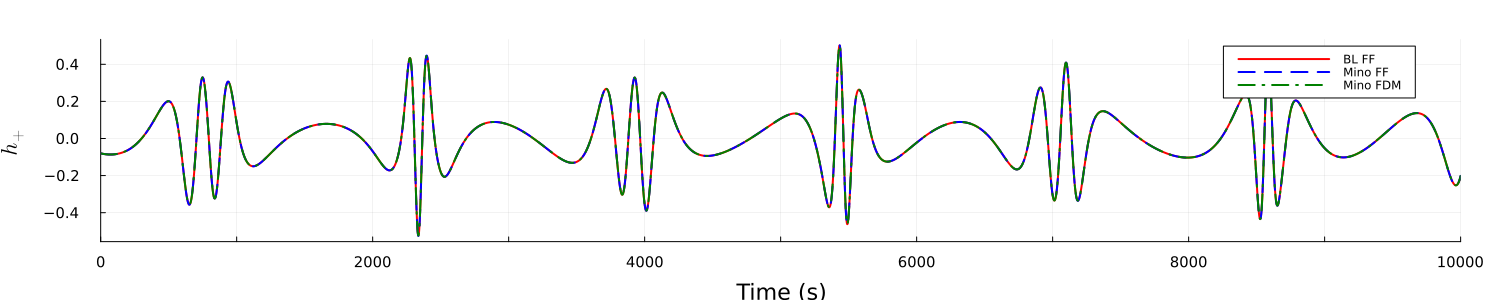

In [11]:
# NOTE: can multiply by "strain_to_SI" to convert waveform to SI units
gr()
p1 = plot(t_BL, h_plus_BL, 
color=gsl_col,
linestyle=gsl_ls,
linewidth=gsl_lw,
xlims=(0, 10000),
legend =:topright,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
label = "BL FF",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
dpi=100)

plot!(t_Mino_FF, h_plus_Mino_FF, color=mino_ff_col, linestyle=mino_ff_ls, linewidth=mino_ff_lw, label="Mino FF")

plot!(t_Mino_FDM, h_plus_Mino_FDM, color=mino_fdm_col, linestyle=mino_fdm_ls, linewidth=mino_fdm_lw, label="Mino FDM")

display("image/png", p1)

# Comparing hybrid and full-FDM inspiral implementations over a longer time

We compare the fourier-fit-FDM hybrid implementation to the full-FDM inspiral for an inspiral evolved for 0.01 years (with the same parameters and duration as Fig. 5 in [1]). Warning: these inspirals will take ~7 minutes to compute.

In [12]:
t_max_secs = (10^-2) * year  # seconds
t_max_M = t_max_secs / MtoSecs;   # units of M

In [13]:
# plot attributes
mino_ff_col = :red
mino_ff_ls = :solid
mino_ff_lw = 2.0

mino_fdm_col = :blue
mino_fdm_ls = :dash
mino_fdm_lw = 2.0;

In [14]:
include("compute_Mino_FF_inspiral.jl");

File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_nHarm_3_fit_range_factor_0.05_Mino_fourier_Julia_fit.h5
367.473269 seconds (260.19 M allocations: 98.289 GiB, 3.84% gc time, 0.00% compilation time)


In [15]:
include("compute_Mino_FDM_inspiral.jl");

File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_h_0.001_Mino_fdm.h5
108.707695 seconds (205.68 M allocations: 7.439 GiB, 1.61% gc time)


### Plot constants of motion

In [16]:
## Fourier Fit ##

# load trajectory
λ_Mino_FF, t_Mino_FF, r_Mino_FF, θ_Mino_FF, ϕ_Mino_FF, dr_dt_Mino_FF, dθ_dt_Mino_FF, dϕ_dt_Mino_FF,
d2r_dt2_Mino_FF, d2θ_dt2_Mino_FF, d2ϕ_dt2_Mino_FF, dt_dτ_Mino_FF, dt_dλ_Mino_FF = ChimeraInspiral.FourierFit.MinoTime.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);
t_Mino_FF = t_Mino_FF * MtoSecs;

# load fluxes
t_Fluxes_Mino_FF, EE_Mino_FF, Edot_Mino_FF, LL_Mino_FF, Ldot_Mino_FF, QQ_Mino_FF, Qdot_Mino_FF, CC_Mino_FF, Cdot_Mino_FF,
pArray_Mino_FF, ecc_Mino_FF, θmin_Mino_FF = ChimeraInspiral.FourierFit.MinoTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);
t_Fluxes_Mino_FF = t_Fluxes_Mino_FF * MtoSecs;

# compute iota
ι_Mino_FF = @. acos(LL_Mino_FF / sqrt(LL_Mino_FF^2 + CC_Mino_FF));

## FDM ##

# load trajectory
λ_Mino_FDM, t_Mino_FDM, r_Mino_FDM, θ_Mino_FDM, ϕ_Mino_FDM, dr_dt_Mino_FDM, dθ_dt_Mino_FDM,
dϕ_dt_Mino_FDM, d2r_dt2_Mino_FDM, d2θ_dt2_Mino_FDM, d2ϕ_dt2_Mino_FDM, dt_dτ_Mino_FDM, dt_dλ_Mino_FDM = ChimeraInspiral.FiniteDifferences.MinoTime.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);
t_Mino_FDM = t_Mino_FDM * MtoSecs;

# load fluxes
t_Fluxes_Mino_FDM, EE_Mino_FDM, Edot_Mino_FDM, LL_Mino_FDM, Ldot_Mino_FDM, QQ_Mino_FDM, Qdot_Mino_FDM, CC_Mino_FDM, Cdot_Mino_FDM,
pArray_Mino_FDM, ecc_Mino_FDM, θmin_Mino_FDM = 
ChimeraInspiral.FiniteDifferences.MinoTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);
t_Fluxes_Mino_FDM = t_Fluxes_Mino_FDM * MtoSecs;

# compute_fluxes
ι_Mino_FDM = @. acos(LL_Mino_FDM / sqrt(LL_Mino_FDM^2 + CC_Mino_FDM));

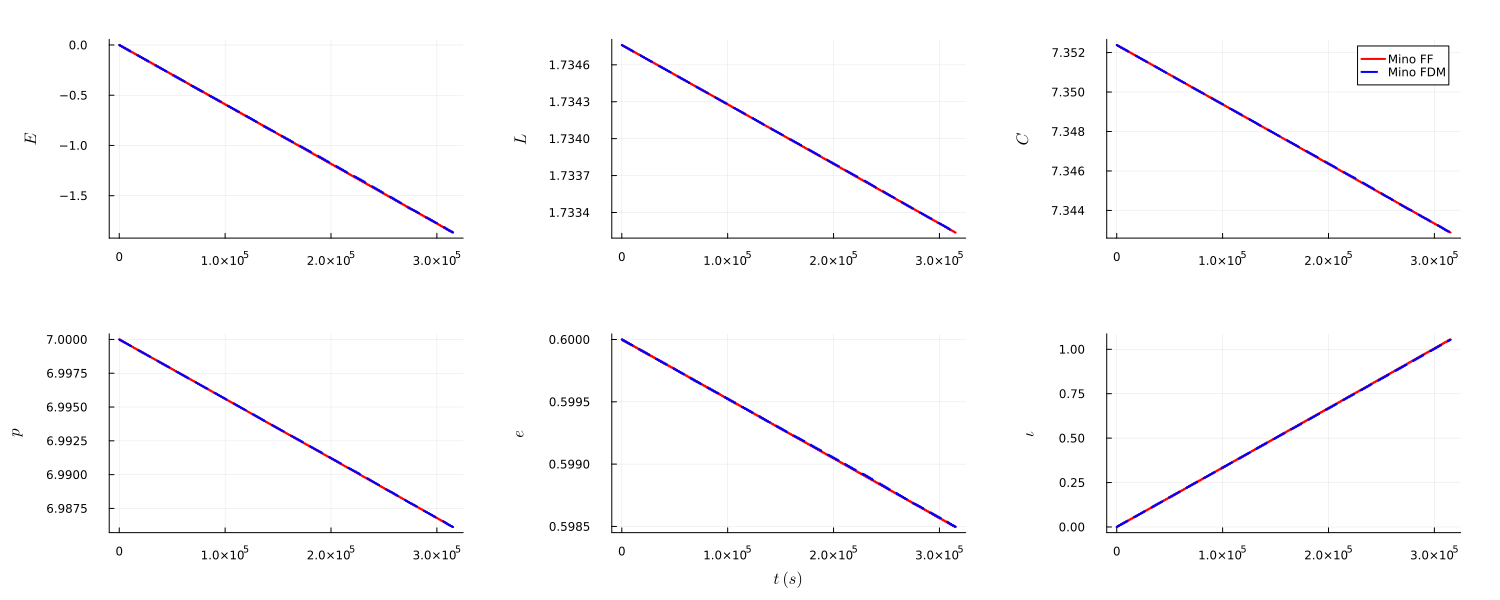

In [17]:
gr()
# plot Mino FF results
plotE = Plots.plot(t_Fluxes_Mino_FF, 1e4 * (EE_Mino_FF .- EE_Mino_FF[1]), ylabel=L"E", legend=:false,
    color=mino_ff_col, linestyle=mino_ff_ls, linewidth=mino_ff_lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotL = Plots.plot(t_Fluxes_Mino_FF, LL_Mino_FF, ylabel=L"L", legend=:false,
    color=mino_ff_col, linestyle=mino_ff_ls, linewidth=mino_ff_lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotC = Plots.plot(t_Fluxes_Mino_FF, CC_Mino_FF, ylabel=L"C", label="Mino FF",
    color=mino_ff_col, linestyle=mino_ff_ls, linewidth=mino_ff_lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotP = Plots.plot(t_Fluxes_Mino_FF, pArray_Mino_FF, ylabel=L"p", legend=:false, 
    color=mino_ff_col, linestyle=mino_ff_ls, linewidth=mino_ff_lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotEcc = Plots.plot(t_Fluxes_Mino_FF, ecc_Mino_FF, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=mino_ff_col, linestyle=mino_ff_ls, linewidth=mino_ff_lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotι = Plots.plot(t_Fluxes_Mino_FF, 1e4 * (ι_Mino_FF .- ι_Mino_FF[1]), ylabel=L"\iota", legend=:false,
    color=mino_ff_col, linestyle=mino_ff_ls, linewidth=mino_ff_lw,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

# plot Mino FDM results
Plots.plot!(plotE, t_Fluxes_Mino_FDM, 1e4 * (EE_Mino_FDM .- EE_Mino_FDM[1]), legend=:false, color=mino_fdm_col, linestyle=mino_fdm_ls, linewidth=mino_fdm_lw)
Plots.plot!(plotL, t_Fluxes_Mino_FDM, LL_Mino_FDM, legend=:false, color=mino_fdm_col, linestyle=mino_fdm_ls, linewidth=mino_fdm_lw)
Plots.plot!(plotC, t_Fluxes_Mino_FDM, CC_Mino_FDM, label="Mino FDM", color=mino_fdm_col, linestyle=mino_fdm_ls, linewidth=mino_fdm_lw)
Plots.plot!(plotP, t_Fluxes_Mino_FDM, pArray_Mino_FDM, legend=:false, color=mino_fdm_col, linestyle=mino_fdm_ls, linewidth=mino_fdm_lw)
Plots.plot!(plotEcc, t_Fluxes_Mino_FDM, ecc_Mino_FDM, legend=:false, color=mino_fdm_col, linestyle=mino_fdm_ls, linewidth=mino_fdm_lw)
Plots.plot!(plotι, t_Fluxes_Mino_FDM,1e4 * (ι_Mino_FDM .- ι_Mino_FDM[1]), legend=:false, color=mino_fdm_col, linestyle=mino_fdm_ls, linewidth=mino_fdm_lw)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]), 
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

Note that we plot rescaled versions of $E$ and $\iota$— see the code in the cell above.

### Gravitational waveform

In [18]:
@time ChimeraInspiral.FourierFit.MinoTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);
t_wf_Mino_FF, h_plus_Mino_FF, h_cross_Mino_FF = ChimeraInspiral.FourierFit.MinoTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);

@time ChimeraInspiral.FiniteDifferences.MinoTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);
t_wf_Mino_FDM, h_plus_Mino_FDM, h_cross_Mino_FDM = ChimeraInspiral.FiniteDifferences.MinoTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_nHarm_3_fit_range_factor_0.05_Mino_fourier_Julia_fit.h5
 24.315624 seconds (2.84 G allocations: 43.525 GiB, 38.38% gc time)
File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_h_0.001_Mino_fdm.h5
 22.778005 seconds (2.88 G allocations: 44.177 GiB, 40.06% gc time)


Below we plot the final 10,000 seconds of the waveform

In [19]:
tF = minimum([maximum(t_Mino_FF), maximum(t_Mino_FDM)])
t_Mino_FF_plot = t_Mino_FF .- (tF - 10000);
t_Mino_FDM_plot = t_Mino_FDM .- (tF - 10000);

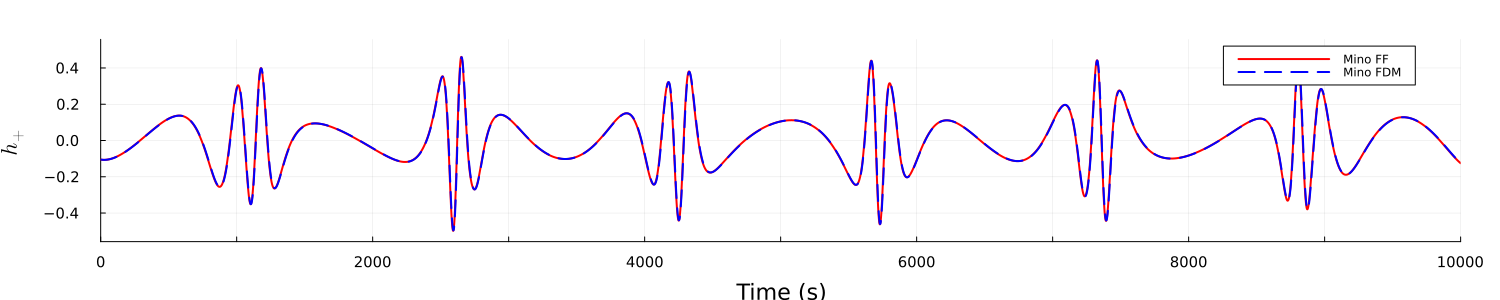

In [20]:
# NOTE: can multiply by "strain_to_SI" to convert waveform to SI units
gr()
p1 = plot(t_Mino_FF_plot, h_plus_Mino_FF, 
color=mino_ff_col,
linestyle=mino_ff_ls,
linewidth=mino_ff_lw,
xlims=(0, 10000),
legend =:topright,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
label = "Mino FF",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
dpi=100)

plot!(t_Mino_FDM_plot, h_plus_Mino_FDM, color=mino_fdm_col, linestyle=mino_fdm_ls, linewidth=mino_fdm_lw, label="Mino FDM")

display("image/png", p1)

## References

[1] Sopuerta, C., & Yunes, N. New Kludge Scheme for the Construction of Approximate Waveforms for Extreme-Mass-Ratio Inspirals. [arXiv:1109.0572](https://arxiv.org/abs/1109.0572)